In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

import copy

from sklearn.cluster import Birch
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning


/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
df = pd.read_csv('../raw_data.csv')
df.head()

,startCarNumber,totalCarNumber,overhead,duration
0,447,450,2.768734,245
1,446,450,2.023143,301
2,447,450,2.030273,413
3,445,450,3.589532,299
4,448,450,1.961595,416


In [104]:
df.describe()

,startCarNumber,totalCarNumber,overhead,duration,c
count,216308.000000,216308.000000,216308.000000,2.163080e+05,216307.000000
mean,440.133657,452.540174,2.577641,7.453972e+02,0.000000
std,157.473834,165.308482,3.911845,1.429304e+04,3.027341
min,46.000000,50.000000,0.746820,2.000000e+00,-370.000000
25%,347.000000,350.000000,1.352356,1.760000e+02,0.000000
50%,496.000000,500.000000,1.725709,3.000000e+02,0.000000
75%,545.000000,550.000000,2.239841,4.620000e+02,0.000000
max,706.000000,720.000000,30.000000,1.024760e+06,450.000000


In [106]:
df_before = df.iloc[:108154, :].reset_index()
df_after = df.iloc[108154: , :].reset_index()

In [107]:
df_before.describe()

,index,startCarNumber,totalCarNumber,overhead,duration,c
count,108154.000000,108154.000000,108154.000000,108154.000000,108154.000000,108153.000000
mean,54076.500000,422.300867,426.502395,1.871568,456.258039,0.000925
std,31221.514844,168.165007,169.939188,1.109122,6041.076855,2.356543
min,0.000000,46.000000,50.000000,0.746820,2.000000,-250.000000
25%,27038.250000,298.000000,300.000000,1.340757,172.000000,0.000000
50%,54076.500000,496.000000,500.000000,1.684054,292.000000,0.000000
75%,81114.750000,546.000000,550.000000,2.113614,437.000000,0.000000
max,108153.000000,619.000000,620.000000,30.000000,331056.000000,450.000000


In [108]:
df_after.describe()

,index,startCarNumber,totalCarNumber,overhead,duration,c
count,108154.000000,108154.000000,108154.000000,108154.000000,1.081540e+05,108154.000000
mean,162230.500000,457.966446,478.577954,3.283714,1.034536e+03,-0.000925
std,31221.514844,143.808044,156.265059,5.327097,1.928528e+04,3.574401
min,108154.000000,47.000000,50.000000,0.749488,2.000000e+00,-370.000000
25%,135192.250000,422.000000,450.000000,1.365611,1.790000e+02,0.000000
50%,162230.500000,496.000000,500.000000,1.776702,3.100000e+02,0.000000
75%,189268.750000,545.000000,600.000000,2.413407,4.940000e+02,0.000000
max,216307.000000,706.000000,720.000000,30.000000,1.024760e+06,450.000000


In [7]:
df_before = df
df_before['c'] = df_before['totalCarNumber'].diff()
df_filtered = df_before[df_before['c'] != 0]

index_list = df_filtered.index.tolist() # list of the start poisitions of index for change of values 
print(len(index_list))
print('\n')
print(index_list)

l_mod = index_list + [max(index_list)+1] # creating a list of indexes to iterate over (must have 0 in it)
list_of_dfs = [df_before.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)] # creating a list of dfs for each index

len(list_of_dfs)

47


[0, 9306, 19649, 30905, 39450, 44253, 45957, 50882, 52580, 56349, 65629, 75710, 86434, 95646, 102155, 107833, 118361, 127897, 137861, 145114, 151875, 156688, 158696, 167350, 169543, 172210, 175042, 176831, 177809, 178214, 179309, 179740, 180605, 184053, 187824, 191882, 195161, 197135, 198704, 202152, 205164, 208509, 208853, 211279, 212609, 213090, 215879]


47

In [9]:
one = list_of_dfs[1]

In [19]:
one['duration']

9306     356
9307     111
9308     374
9309     240
9310     412
        ... 
19644    143
19645    136
19646    359
19647    125
19648    287
Name: duration, Length: 10343, dtype: int64

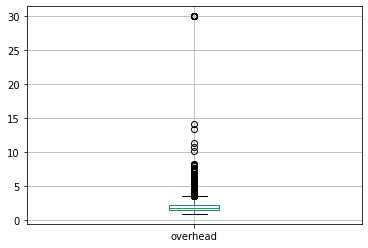

In [10]:
boxplot = one.boxplot(column=['overhead'])

In [12]:
one.describe()

,startCarNumber,totalCarNumber,overhead,duration,c
count,10343.000000,10343.0,10343.000000,10343.000000,10343.000000
mean,515.279899,520.0,1.945051,367.850720,0.006768
std,7.484495,0.0,1.230206,1040.846465,0.688295
min,445.000000,520.0,0.855643,2.000000,0.000000
25%,515.000000,520.0,1.376096,177.000000,0.000000
50%,516.000000,520.0,1.759958,307.000000,0.000000
75%,517.000000,520.0,2.220526,465.000000,0.000000
max,519.000000,520.0,30.000000,30674.000000,70.000000


In [38]:
duration_df = pd.DataFrame()
counter = 0
for i in list_of_dfs:
    duration_df = pd.concat([duration_df,i['duration'].reset_index()['duration']], ignore_index=True, axis=1)
    counter += 1

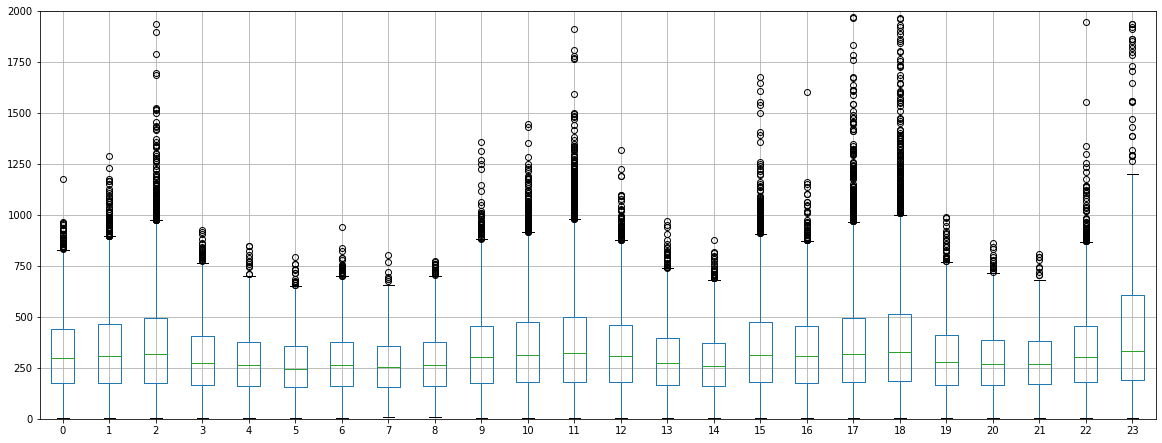

In [76]:
columns = list(range(0, 24))
fig, ax = plt.subplots(figsize=(20,7.5))
boxplot = duration_df.boxplot(column=columns, ax=ax)
ax.set_ylim([0,2000])
plt.show()

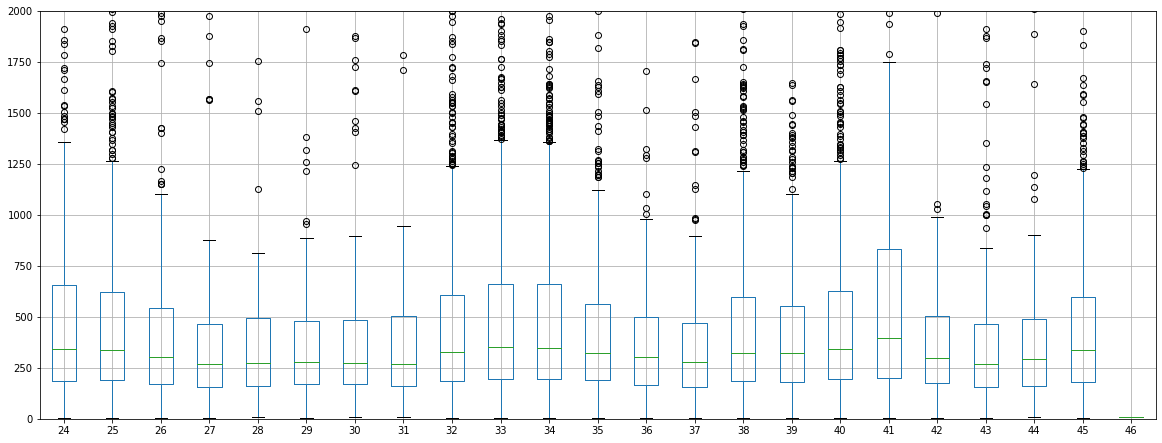

In [75]:
columns = list(range(24, 47))
fig, ax = plt.subplots(figsize=(20,7.5))
boxplot = duration_df.boxplot(column=columns, ax=ax)
ax.set_ylim([0,2000])
plt.show()

In [67]:
overhead_df = pd.DataFrame()
counter = 0
for i in list_of_dfs:
    overhead_df = pd.concat([overhead_df,i['overhead'].reset_index()['overhead']], ignore_index=True, axis=1)
    counter += 1

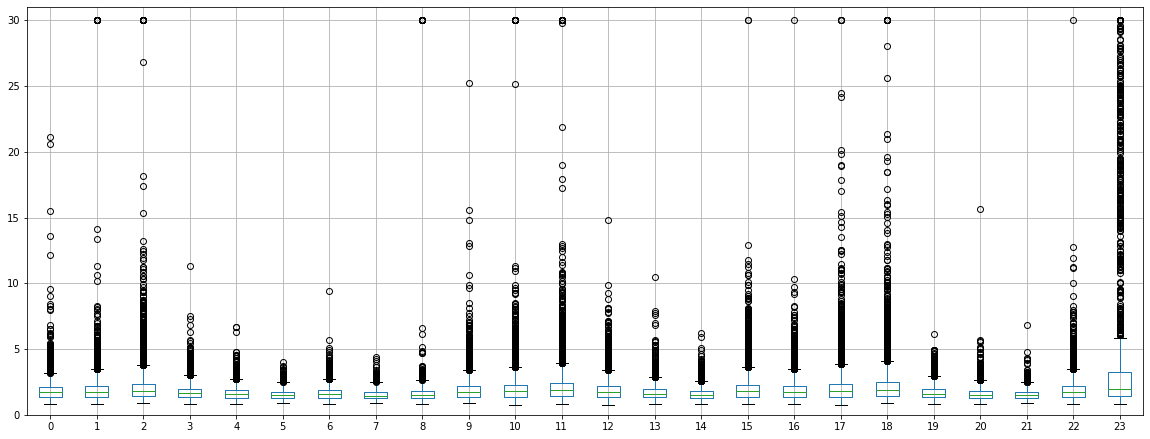

In [74]:
columns = list(range(0, 24))
fig, ax = plt.subplots(figsize=(20,7.5))
boxplot = overhead_df.boxplot(column=columns, ax=ax)
ax.set_ylim([0,31])
plt.show()

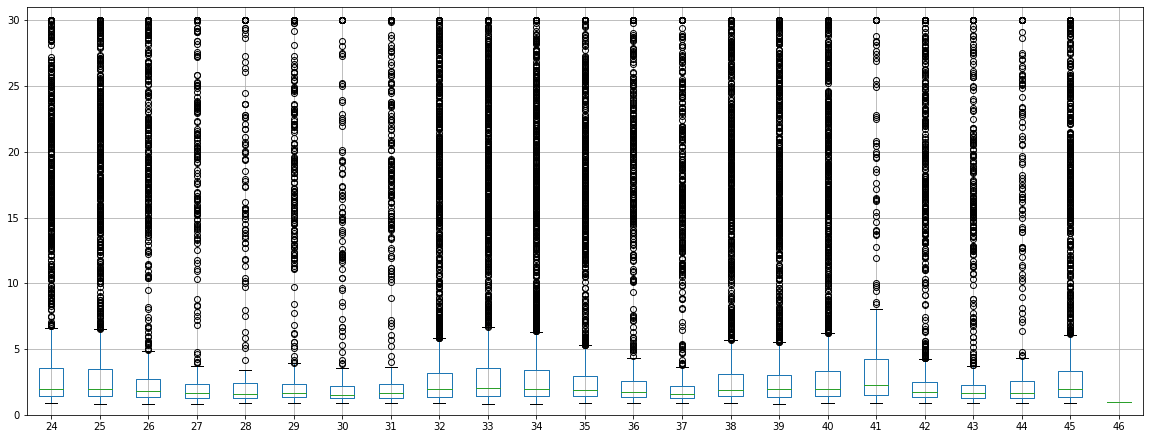

In [73]:
columns = list(range(24, 47))
fig, ax = plt.subplots(figsize=(20,7.5))
boxplot = overhead_df.boxplot(column=columns, ax=ax)
ax.set_ylim([0,31])
plt.show()

In [97]:
df_data = pd.read_csv('../data.csv')
df_data.head()

,index,totalCarNumber,numberOfTrips,median_overhead,q1_overhead,q3_overhead,p9_overhead
0,0,450,1115,1.728649,1.424695,2.118387,2.599742
1,1,450,1657,1.666194,1.334938,2.083841,2.663684
2,2,450,1650,1.700305,1.353933,2.105350,2.582390
3,3,450,1651,1.708622,1.350846,2.118855,2.583843
4,4,450,1665,1.696678,1.336587,2.063092,2.530545


In [98]:
df_data = df_data.iloc[::6, :].reset_index()
df_data = df_data.drop(columns=['index', 'level_0'])
df_data.head(10)

# ax = df_data.plot.bar( y='numberOfTrips', rot=90, figsize=(20,7.5))

,totalCarNumber,numberOfTrips,median_overhead,q1_overhead,q3_overhead,p9_overhead
0,450,1115,1.728649,1.424695,2.118387,2.599742
1,520,1704,1.745478,1.385270,2.215435,2.800687
2,600,1862,1.871453,1.416802,2.414136,3.113181
3,350,1430,1.635319,1.322908,1.994190,2.389933
4,200,795,1.572869,1.314513,1.877636,2.200217
5,50,289,1.456233,1.255471,1.727303,2.043809
6,200,831,1.548349,1.315819,1.871318,2.271881
7,50,292,1.436301,1.253443,1.791784,2.120706
8,150,638,1.498739,1.250609,1.791148,2.203880
9,500,1585,1.717376,1.361498,2.142644,2.667543


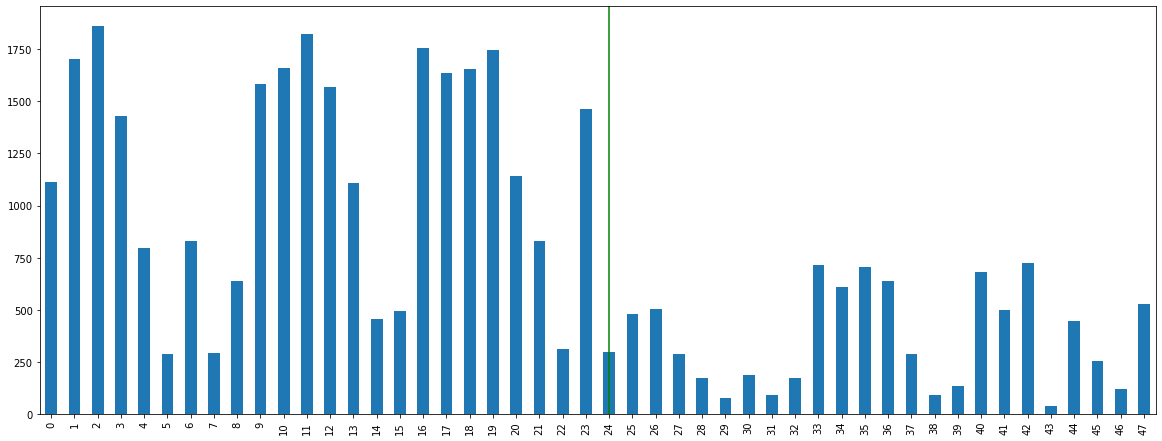

In [109]:
fig, ax = plt.subplots(figsize=(20,7.5))
ax = df_data.plot.bar(y='numberOfTrips', rot=90, ax=ax, legend=None)
ax.axvline(x=24, c='g')